In [3]:
# importing desired libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


import warnings
warnings.simplefilter(action='ignore')

In [4]:
# Problem Statement:
'''
The dataset provided predictive feature like education , employment status , marital status to
predict if the salary is greater than $50K
It can be used to practice machine learning problem like classification.
'''
'''
--------Perform Binary Classification to predict if Salary is greater than $50K----------
'''

'\n--------Perform Binary Classification to predict if Salary is greater than $50K----------\n'

In [5]:
import zipfile
import os

zip_file_path = "C:\\Users\\saira\\Downloads\\archive (1).zip"
extract_folder = "C:\\Users\\saira\\Downloads\\income"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Folder {zip_file_path} extracted to {extract_folder}")

Folder C:\Users\saira\Downloads\archive (1).zip extracted to C:\Users\saira\Downloads\income


In [6]:
# Importing train data

df = pd.read_csv(r"C:\Users\saira\Downloads\income\train.csv")
df.head(-10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43942,39,Private,33355,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1
43943,53,Private,153064,5th-6th,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1
43944,53,Private,30290,HS-grad,9,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,0
43945,46,Private,177114,Assoc-acdm,12,Widowed,Prof-specialty,Unmarried,White,Female,0,0,27,United-States,0


In [7]:
df.shape

(43957, 15)

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [9]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income_>50K         int64
dtype: object

In [10]:
for i in df.columns:
    print(i, len(df[i].unique()))
    print(df[i].unique())
    print()

age 74
[67 17 31 58 25 59 70 35 28 21 30 20 45 76 54 19 44 47 37 27 24 49 36 71
 62 64 53 34 42 26 43 23 56 40 63 50 29 52 33 38 66 46 32 68 41 80 73 39
 57 51 69 22 18 55 65 60 48 61 72 90 74 77 75 81 82 88 84 83 79 78 85 89
 87 86]

workclass 9
['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' nan 'Never-worked' 'Without-pay']

fnlwgt 26646
[366425 244602 174201 ...  68982 116562 375827]

education 16
['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm']

educational-num 16
[16  8 13  4 10  9  5  6  7 14  1  3 15 11  2 12]

marital-status 7
['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']

occupation 15
['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-special

In [11]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [12]:
# Removing duplicate records

df.drop_duplicates(inplace=True,ignore_index=True)
df.shape 

(43912, 15)

In [13]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43912 entries, 0 to 43911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43912 non-null  int64 
 1   workclass        41418 non-null  object
 2   fnlwgt           43912 non-null  int64 
 3   education        43912 non-null  object
 4   educational-num  43912 non-null  int64 
 5   marital-status   43912 non-null  object
 6   occupation       41410 non-null  object
 7   relationship     43912 non-null  object
 8   race             43912 non-null  object
 9   gender           43912 non-null  object
 10  capital-gain     43912 non-null  int64 
 11  capital-loss     43912 non-null  int64 
 12  hours-per-week   43912 non-null  int64 
 13  native-country   43149 non-null  object
 14  income_>50K      43912 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [14]:
'''Above info shows that there are null values in "workclass","occupation" and "native-country"'''
'''Another method we can use to find out nulls - '''

df.isnull().sum()

age                   0
workclass          2494
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2502
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

# NULL HANDLING



***1. Deleting the null value records from the dataset as they are around 5% of number of total records in df***

Dropping out the null records

In [15]:
null_col = ["workclass","occupation","native-country"]

df.dropna(inplace=True) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40686 entries, 0 to 43911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40686 non-null  int64 
 1   workclass        40686 non-null  object
 2   fnlwgt           40686 non-null  int64 
 3   education        40686 non-null  object
 4   educational-num  40686 non-null  int64 
 5   marital-status   40686 non-null  object
 6   occupation       40686 non-null  object
 7   relationship     40686 non-null  object
 8   race             40686 non-null  object
 9   gender           40686 non-null  object
 10  capital-gain     40686 non-null  int64 
 11  capital-loss     40686 non-null  int64 
 12  hours-per-week   40686 non-null  int64 
 13  native-country   40686 non-null  object
 14  income_>50K      40686 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [16]:
# Separating out categorical and numerical data columns

nums = []
cat = []

for i in df.columns:
    if df[i].dtypes=='O':
        cat.append(i)
    else:
        nums.append(i)

EDA

over all income distribution

0    75.207688
1    24.792312
Name: income_>50K, dtype: float64



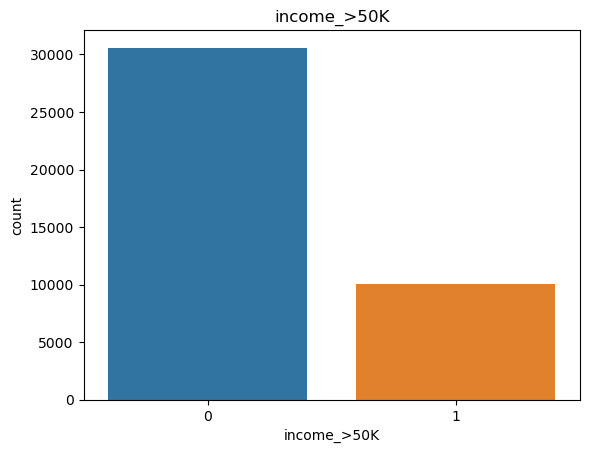

In [17]:
print(df["income_>50K"].value_counts()/len(df)*100)
print()

sns.countplot(data=df,x='income_>50K')
plt.title('income_>50K')
plt.show()

Around 24% of the people have income above 50k, in overall dataset

Countrywise Income

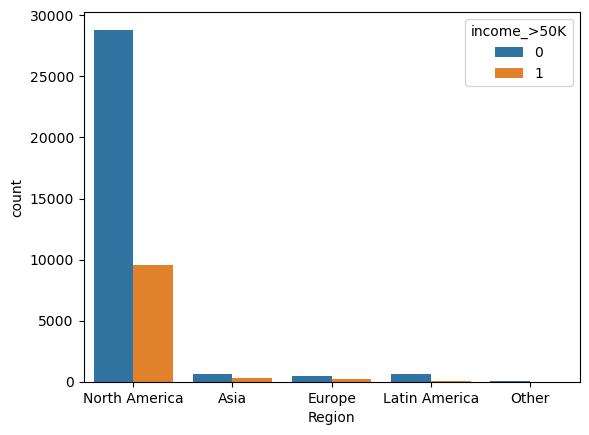

In [18]:
north_america = ['United-States', 'Mexico', 'Canada', 'Puerto-Rico', 'Cuba']
asia = ['Japan', 'South', 'Philippines', 'China', 'Vietnam', 'Thailand', 'India', 'Cambodia', 'Yugoslavia', 'Iran', 'Taiwan', 'Hong']
europe = ['Portugal', 'Italy', 'England', 'Germany', 'Poland', 'Greece', 'Ireland', 'Scotland', 'France', 'Hungary']
latin_america = ['Ecuador', 'Dominican-Republic', 'Jamaica', 'El-Salvador', 'Guatemala', 'Columbia', 'Haiti', 'Peru', 'Nicaragua', 'Trinadad&Tobago']
other = ['Outlying-US(Guam-USVI-etc)', 'Ireland', 'Canada', 'Laos', 'Honduras', 'Holand-Netherlands']

# Create a new column 'Region' based on the categories
df['Region'] = df['native-country'].apply(lambda x: 'North America' if x in north_america
                                   else 'Asia' if x in asia
                                   else 'Europe' if x in europe
                                   else 'Latin America' if x in latin_america
                                   else 'Other')

# df.drop(columns["Region"], inplace=True)

sns.countplot(data=df, x='Region', hue="income_>50K")
plt.show()

Genderwise Income Distribution

gender  income_>50K
Female  0              11722
        1               1504
Male    0              18877
        1               8583
Name: income_>50K, dtype: int64
-----
Male Income Distribution:

 0    68.743627
1    31.256373
Name: income_>50K, dtype: float64
-----
Female Income Distribution:

 0    88.628459
1    11.371541
Name: income_>50K, dtype: float64
-----


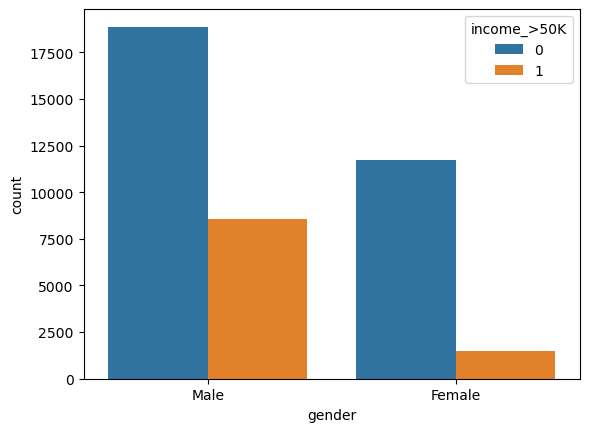

In [19]:
print(df.groupby(df["gender"])["income_>50K"].value_counts())
print('-----')

print("Male Income Distribution:\n\n", df[df["gender"]=='Male']["income_>50K"].value_counts()/len(df[df["gender"]=='Male'])*100)
print('-----')
print("Female Income Distribution:\n\n", df[df["gender"]=='Female']["income_>50K"].value_counts()/len(df[df["gender"]=='Female'])*100)
print('-----')

sns.countplot(data=df, x='gender', hue="income_>50K")
plt.show()

***Above distribution shows that the ratio of females having >50k income is 10%, lesser than that of male, which is around 30%

In [20]:
df["occupation"].unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', 'Tech-support', 'Priv-house-serv', 'Armed-Forces'],
      dtype=object)

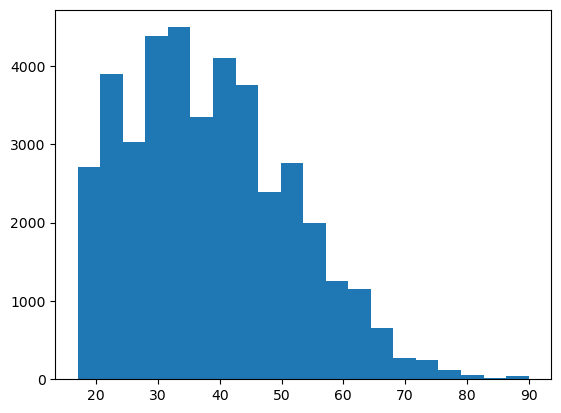

In [21]:
'''
matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False,
bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, 
color=None, label=None, stacked=False, *, data=None, **kwargs)
'''

plt.hist(x='age',bins=20,data=df)
plt.show()

In [22]:
df['age'].value_counts().index

Int64Index([33, 36, 31, 35, 34, 23, 37, 28, 38, 30, 32, 29, 27, 41, 39, 40, 24,
            25, 26, 42, 43, 47, 22, 46, 44, 45, 20, 21, 19, 51, 50, 49, 48, 18,
            52, 53, 54, 55, 56, 57, 17, 58, 59, 60, 61, 62, 64, 63, 65, 67, 66,
            68, 69, 70, 71, 73, 72, 74, 75, 76, 90, 77, 80, 81, 78, 79, 83, 84,
            82, 88, 85, 87, 86, 89],
           dtype='int64')

In [23]:
df['age'].value_counts()

33    1165
36    1156
31    1150
35    1137
34    1116
      ... 
88       5
85       4
87       1
86       1
89       1
Name: age, Length: 74, dtype: int64

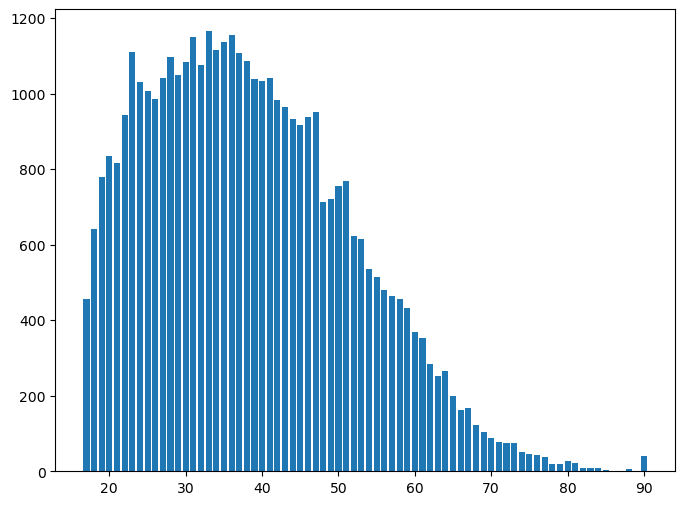

In [24]:
'''
matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
'''
age = df['age'].value_counts().index
count = df['age'].value_counts().values

plt.figure(figsize=(8,6))
plt.bar(x=age, height=count)
xlabel = 'age'
ylabel = 'count'
plt.show()

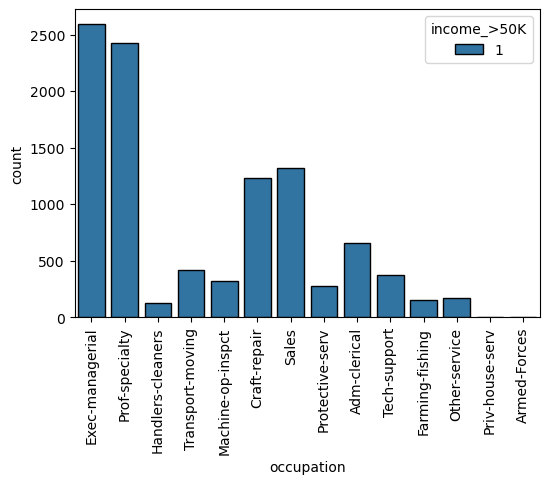

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='occupation',hue='income_>50K',data=df[df["income_>50K"]==1],edgecolor='black')
plt.xticks(rotation=90)
plt.show()

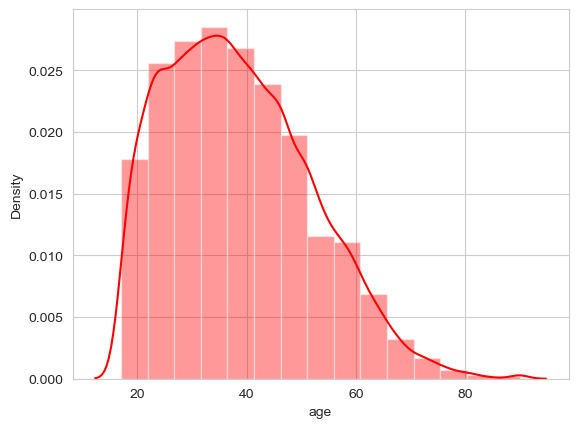

In [26]:
# set the background style of the plot
sns.set_style('whitegrid')
sns.distplot(df['age'], kde = True, color ='red', bins = 15)
plt.show()

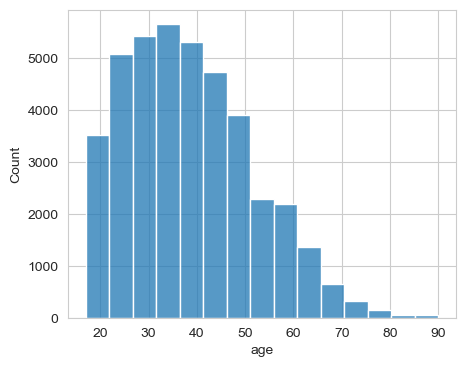

In [27]:
plt.figure(figsize=(5,4))
sns.histplot(df["age"],bins=15)
plt.show()

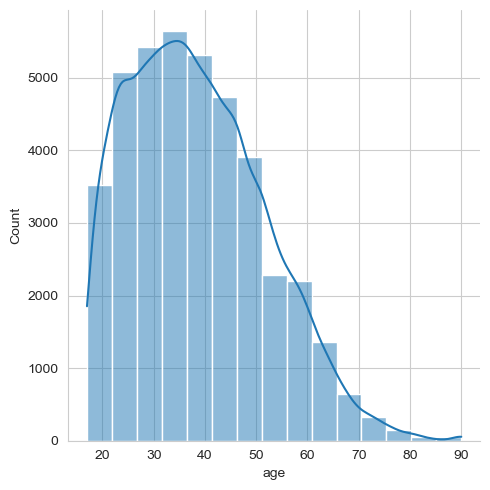

In [28]:
# Create Histogram with Density Curve Using Seaborn
sns.displot(df["age"], kde=True, bins=15)
plt.show()

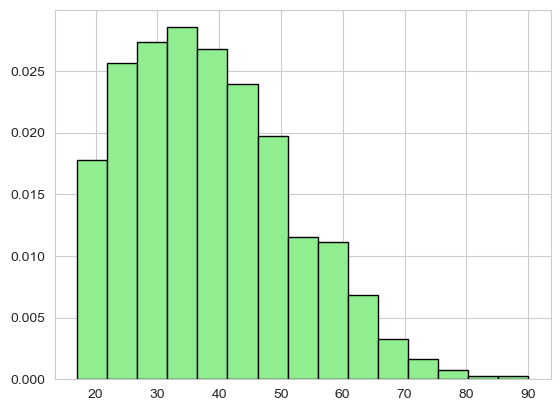

In [29]:
plt.hist(df["age"],color='lightgreen',ec="black",bins=15,density=True,)
plt.show()

<AxesSubplot:xlabel='age', ylabel='Density'>

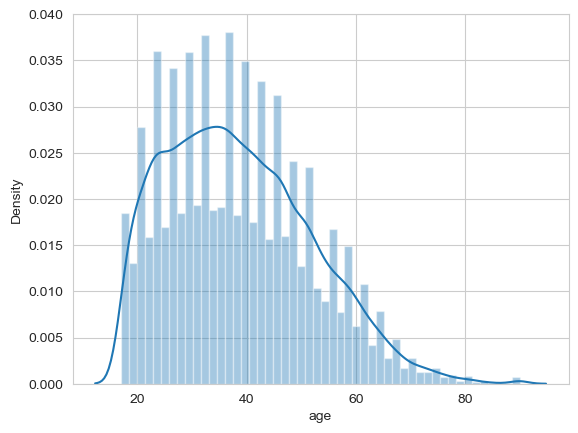

In [30]:
sns.distplot(df["age"],hist=True,kde=True)

In [31]:
nums = []
cat = []

for i in df.columns:
    if df[i].dtypes=='O':
        cat.append(i)
    else:
        nums.append(i)
    
print(nums)
print(cat)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income_>50K']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'Region']


Dealing with categorical values


In [32]:
df["workclass"].value_counts()
# we can remove: Without-pay ,Never-worked

Private             30018
Self-emp-not-inc     3403
Local-gov            2792
State-gov            1721
Self-emp-inc         1470
Federal-gov          1262
Without-pay            20
Name: workclass, dtype: int64

In [33]:
df["occupation"].value_counts()

Craft-repair         5423
Exec-managerial      5412
Prof-specialty       5374
Adm-clerical         4940
Sales                4876
Other-service        4345
Machine-op-inspct    2659
Transport-moving     2085
Handlers-cleaners    1853
Farming-fishing      1333
Tech-support         1295
Protective-serv       866
Priv-house-serv       213
Armed-Forces           12
Name: occupation, dtype: int64

In [34]:
df = df.drop(columns=["education"], axis=1)
cat.remove("education")
df1 = pd.get_dummies(data=df, columns=cat, dtype=int)
df1.head(-10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,Region_Asia,Region_Europe,Region_Latin America,Region_North America,Region_Other
0,67,366425,16,99999,0,60,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,17,244602,8,0,0,15,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,31,174201,13,0,0,40,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43896,33,206512,10,0,0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
43897,39,33355,9,7298,0,48,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
43898,53,153064,3,7688,0,10,1,0,0,1,...,0,0,0,0,1,1,0,0,0,0
43899,53,30290,9,0,0,40,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [35]:
df.head(-10)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Region
0,67,Private,366425,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1,North America
1,17,Private,244602,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0,North America
2,31,Private,174201,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,North America
3,58,State-gov,110199,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0,North America
4,25,State-gov,149248,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43896,33,Private,206512,10,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,0,North America
43897,39,Private,33355,9,Married-civ-spouse,Transport-moving,Husband,White,Male,7298,0,48,United-States,1,North America
43898,53,Private,153064,3,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,10,Yugoslavia,1,Asia
43899,53,Private,30290,9,Never-married,Sales,Not-in-family,White,Female,0,0,40,United-States,0,North America


test.csv

In [36]:
df_test = pd.read_csv(r"C:\Users\saira\Downloads\income\test.csv")
# x_test = df_test

In [37]:
df_test.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [38]:
nums = []
cat = []

for i in df_test.columns:
    if df_test[i].dtypes=='O':
        cat.append(i)
    else:
        nums.append(i)
    
print(nums)
print(cat)

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [39]:
df_test = df_test.drop(columns=["education"], axis=1)
cat.remove("education")
df2 = pd.get_dummies(data=df_test, columns=cat, dtype=int)
df2

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Nicaragua,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States
0,39,327120,9,0,0,40,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,32,123253,12,0,0,42,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,47,232628,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19,374262,8,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,46,311231,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,27,302406,14,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
895,17,218124,7,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
896,24,127139,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
897,35,132879,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
for i in df1.columns:
    if i not in df2.columns and i!="income_>50K":
        df1 = df1.drop(columns=i, axis=1)

Model building

In [41]:
x = df1.drop("income_>50K", axis=1)
y = df1["income_>50K"]

In [42]:
from sklearn.model_selection import train_test_split

# split data into train-test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=10)

In [43]:
# scaling dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

print("Training input variables scaled:")
display(x_train_sc)
print()
print("Testing input variables scaled:")
display(x_test_sc)

Training input variables scaled:


array([[ 0.48730729,  0.90227108,  1.12957007, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [-0.79534922,  0.44601642, -2.01108101, ..., -0.02600734,
        -0.02285998, -3.24745104],
       [ 0.33640652, -0.05486466, -0.44075547, ..., -0.02600734,
        -0.02285998,  0.30793382],
       ...,
       [-0.8707996 ,  0.54892112,  1.12957007, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [-1.09715075, -0.85434628,  1.12957007, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [-0.56899807, -1.38102685,  0.3444073 , ..., -0.02600734,
        -0.02285998,  0.30793382]])


Testing input variables scaled:


array([[-1.3235019 ,  1.09492056, -0.44075547, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [-1.17260113, -1.35331628,  1.12957007, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [ 1.3172615 , -0.02209258, -0.04817408, ..., -0.02600734,
        -0.02285998,  0.30793382],
       ...,
       [-0.94624998,  0.0238678 ,  1.52215146, ..., -0.02600734,
        -0.02285998, -3.24745104],
       [ 0.26095614, -0.46562252,  0.73698869, ..., -0.02600734,
        -0.02285998,  0.30793382],
       [-0.64444845,  0.31714193,  1.12957007, ..., -0.02600734,
        -0.02285998,  0.30793382]])

In [44]:
# Create a logistic regression model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [45]:
# Fit the model to the training data
model.fit(x_train, y_train)
x_train.head(-10)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Nicaragua,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States
16589,45,285060,13,0,0,50,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
38014,28,236834,5,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14472,43,183891,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9238,41,483201,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
36162,38,112561,13,0,0,55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11554,40,151038,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
30993,29,189346,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
33681,31,178506,10,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9976,25,290528,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [46]:
# Make predictions on the testing data
y_pred = model.predict(x_test)

In [47]:
# Evaluate the model
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Accuracy: 0.7930695502580487

              precision    recall  f1-score   support

           0       0.80      0.96      0.88      6124
           1       0.72      0.27      0.39      2014

    accuracy                           0.79      8138
   macro avg       0.76      0.62      0.63      8138
weighted avg       0.78      0.79      0.76      8138



In [48]:
# confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

Confusion matrix : 
 [[ 547 1467]
 [ 217 5907]]
Outcome values : 
 547 1467 217 5907
Classification report : 
               precision    recall  f1-score   support

           1       0.72      0.27      0.39      2014
           0       0.80      0.96      0.88      6124

    accuracy                           0.79      8138
   macro avg       0.76      0.62      0.63      8138
weighted avg       0.78      0.79      0.76      8138

Accuracy : 79.3 %
Precision : 71.6 %
Recall : 27.2 %
F1 Score : 0.394
Specificity or True Negative Rate : 96.5 %
Balanced Accuracy : 61.8 %
MCC : 0.349
roc_auc_score: 0.618


In [49]:
# Results

PredResults = pd.DataFrame({'income>50$':y_test, 'income>50$z':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = df.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(20)

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Region,income>50$,income>50$z
7152,19,Private,267796,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,30,United-States,0,North America,0,0
33249,34,Private,140571,11,Divorced,Tech-support,Unmarried,Black,Female,0,0,40,United-States,0,North America,0,0
2975,29,Private,267034,7,Never-married,Craft-repair,Own-child,Black,Male,0,0,40,Haiti,0,Latin America,0,0
33187,40,Private,109762,10,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,0,North America,0,0
11177,50,State-gov,97778,9,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0,North America,0,0
17047,39,Private,206520,9,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,45,United-States,0,North America,0,0
14769,18,Federal-gov,201686,7,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,4,United-States,0,North America,0,0
27922,43,Private,397280,12,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States,1,North America,1,0
4351,35,Private,189092,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1,North America,1,0
21669,60,Private,156889,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,North America,0,0


In [51]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

     ---------------------------------------- 1.3/1.3 MB 987.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [51]:
a={'Model Name':[], 'Accuracy':[] ,'':[] ,'Precision':[] ,'Recall':[] ,'F1 Score':[] ,'Specificity or True Negative Rate':[] ,'Balanced Accuracy':[],'MCC':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Accuracy,,Precision,Recall,F1 Score,Specificity or True Negative Rate,Balanced Accuracy,MCC


Model Name: LogisticRegression()
Confusion matrix:
 [[ 547 1467]
 [ 217 5907]]
Outcome values:
 547 1467 217 5907
Classification report: 
               precision    recall  f1-score   support

           1       0.72      0.27      0.39      2014
           0       0.80      0.96      0.88      6124

    accuracy                           0.79      8138
   macro avg       0.76      0.62      0.63      8138
weighted avg       0.78      0.79      0.76      8138

Accuracy: 79.3 %
Precision: 71.6 %
Recall: 27.2 %
F1 Score: 0.394
Specificity or True Negative Rate: 96.5 %
Balanced Accuracy: 61.8 %
MCC: 0.349
<function roc_auc_score at 0x0000024C658DD1F0> 0.618


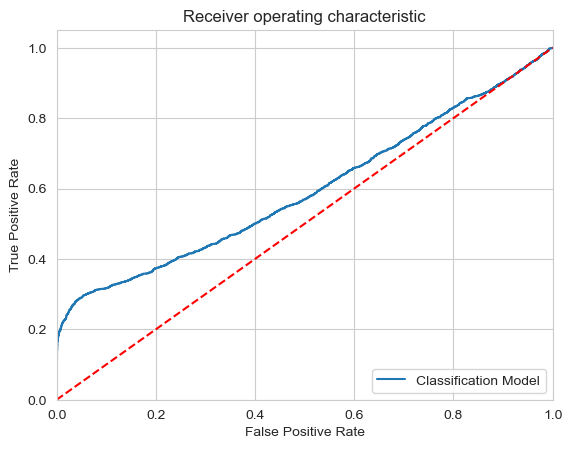

-----------------------------------------------------------------------------
Model Name: DecisionTreeClassifier()
Confusion matrix:
 [[1260  754]
 [ 785 5339]]
Outcome values:
 1260 754 785 5339
Classification report: 
               precision    recall  f1-score   support

           1       0.62      0.63      0.62      2014
           0       0.88      0.87      0.87      6124

    accuracy                           0.81      8138
   macro avg       0.75      0.75      0.75      8138
weighted avg       0.81      0.81      0.81      8138

Accuracy: 81.1 %
Precision: 61.6 %
Recall: 62.6 %
F1 Score: 0.621
Specificity or True Negative Rate: 87.2 %
Balanced Accuracy: 74.9 %
MCC: 0.495
<function roc_auc_score at 0x0000024C658DD1F0> 0.749


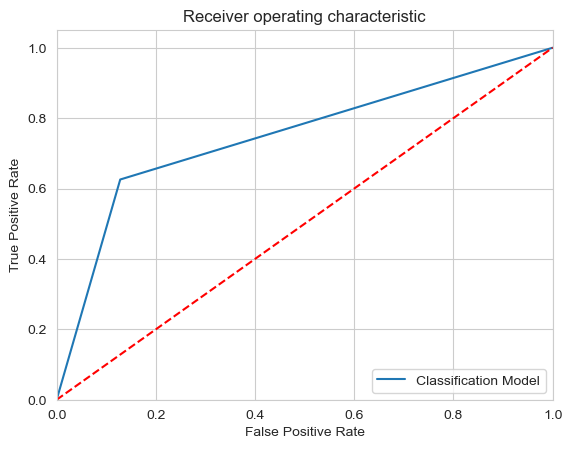

-----------------------------------------------------------------------------
Model Name: RandomForestClassifier()
Confusion matrix:
 [[1274  740]
 [ 434 5690]]
Outcome values:
 1274 740 434 5690
Classification report: 
               precision    recall  f1-score   support

           1       0.75      0.63      0.68      2014
           0       0.88      0.93      0.91      6124

    accuracy                           0.86      8138
   macro avg       0.82      0.78      0.80      8138
weighted avg       0.85      0.86      0.85      8138

Accuracy: 85.6 %
Precision: 74.6 %
Recall: 63.3 %
F1 Score: 0.685
Specificity or True Negative Rate: 92.9 %
Balanced Accuracy: 78.1 %
MCC: 0.595
<function roc_auc_score at 0x0000024C658DD1F0> 0.781


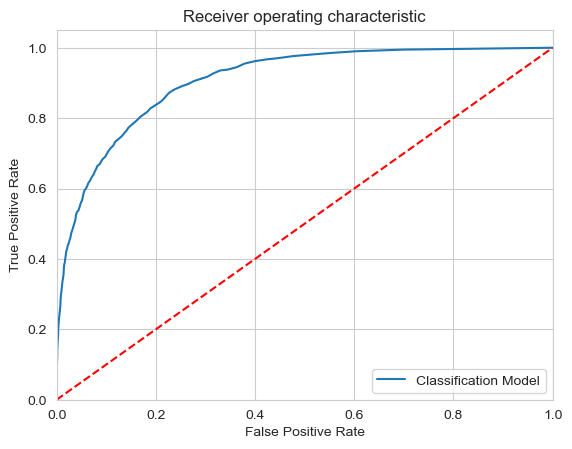

-----------------------------------------------------------------------------
Model Name: ExtraTreesClassifier()
Confusion matrix:
 [[1253  761]
 [ 546 5578]]
Outcome values:
 1253 761 546 5578
Classification report: 
               precision    recall  f1-score   support

           1       0.70      0.62      0.66      2014
           0       0.88      0.91      0.90      6124

    accuracy                           0.84      8138
   macro avg       0.79      0.77      0.78      8138
weighted avg       0.83      0.84      0.84      8138

Accuracy: 83.9 %
Precision: 69.6 %
Recall: 62.2 %
F1 Score: 0.657
Specificity or True Negative Rate: 91.1 %
Balanced Accuracy: 76.6 %
MCC: 0.554
<function roc_auc_score at 0x0000024C658DD1F0> 0.766


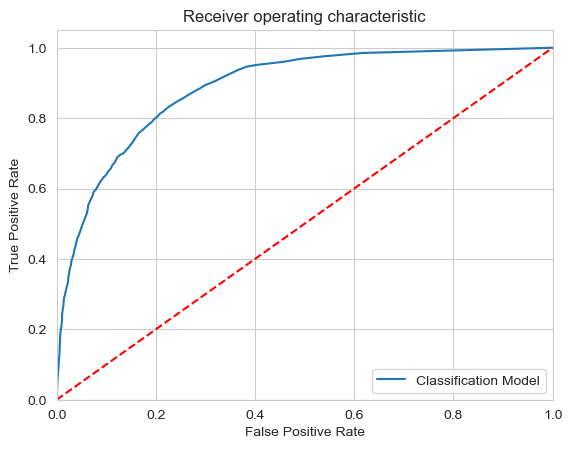

-----------------------------------------------------------------------------
Model Name: KNeighborsClassifier()
Confusion matrix:
 [[ 687 1327]
 [ 533 5591]]
Outcome values:
 687 1327 533 5591
Classification report: 
               precision    recall  f1-score   support

           1       0.56      0.34      0.42      2014
           0       0.81      0.91      0.86      6124

    accuracy                           0.77      8138
   macro avg       0.69      0.63      0.64      8138
weighted avg       0.75      0.77      0.75      8138

Accuracy: 77.1 %
Precision: 56.3 %
Recall: 34.1 %
F1 Score: 0.425
Specificity or True Negative Rate: 91.3 %
Balanced Accuracy: 62.7 %
MCC: 0.307
<function roc_auc_score at 0x0000024C658DD1F0> 0.627


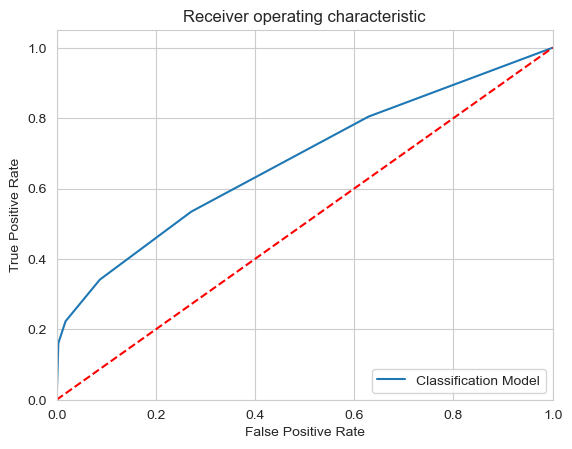

-----------------------------------------------------------------------------
Model Name: GaussianNB()
Confusion matrix:
 [[ 632 1382]
 [ 336 5788]]
Outcome values:
 632 1382 336 5788
Classification report: 
               precision    recall  f1-score   support

           1       0.65      0.31      0.42      2014
           0       0.81      0.95      0.87      6124

    accuracy                           0.79      8138
   macro avg       0.73      0.63      0.65      8138
weighted avg       0.77      0.79      0.76      8138

Accuracy: 78.9 %
Precision: 65.3 %
Recall: 31.4 %
F1 Score: 0.424
Specificity or True Negative Rate: 94.5 %
Balanced Accuracy: 63.0 %
MCC: 0.345
<function roc_auc_score at 0x0000024C658DD1F0> 0.629


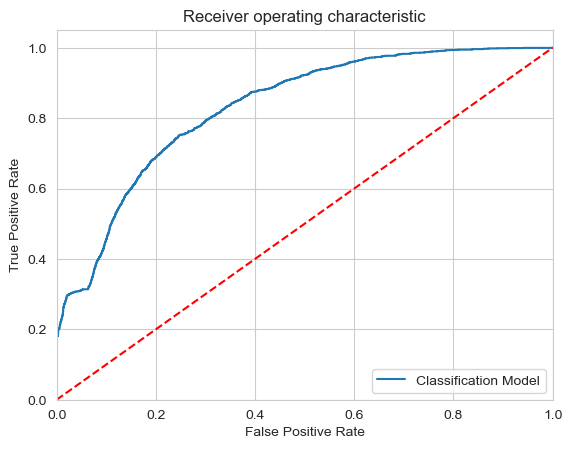

-----------------------------------------------------------------------------
Model Name: SVC(probability=True)
Confusion matrix:
 [[ 342 1672]
 [  10 6114]]
Outcome values:
 342 1672 10 6114
Classification report: 
               precision    recall  f1-score   support

           1       0.97      0.17      0.29      2014
           0       0.79      1.00      0.88      6124

    accuracy                           0.79      8138
   macro avg       0.88      0.58      0.58      8138
weighted avg       0.83      0.79      0.73      8138

Accuracy: 79.3 %
Precision: 97.2 %
Recall: 17.0 %
F1 Score: 0.289
Specificity or True Negative Rate: 99.8 %
Balanced Accuracy: 58.4 %
MCC: 0.357
<function roc_auc_score at 0x0000024C658DD1F0> 0.584


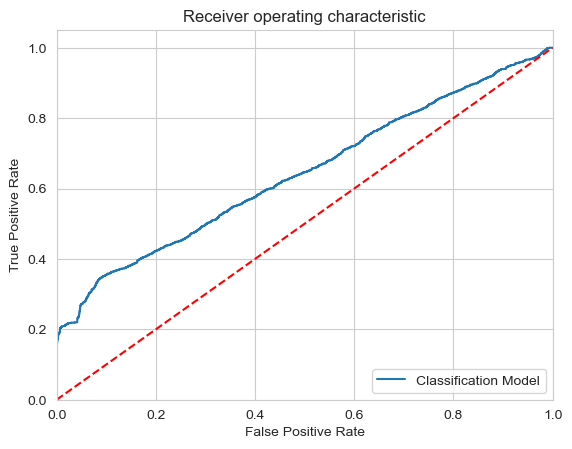

-----------------------------------------------------------------------------
Model Name: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Confusion matrix:
 [[ 392 1622]
 [   2 6122]]
Outcome values:
 392 1622 2 6122
Classification report: 
               precision    recall  f1-score   su

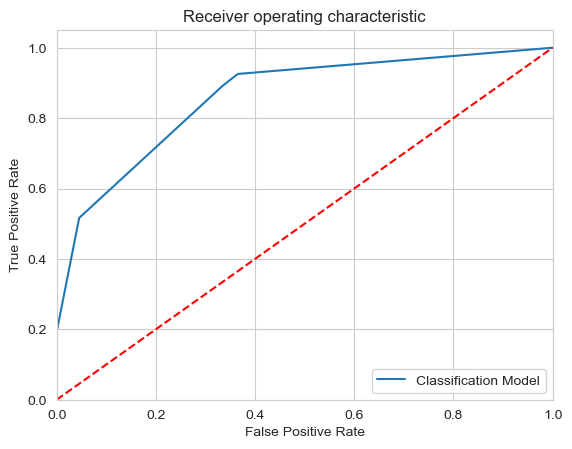

-----------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 8073, number of negative: 24475
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 734
[LightGBM] [Info] Number of data points in the train set: 32548, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.248034 -> initscore=-1.109127
[LightGBM] [Info] Start training from score -1.109127
Model Name: LGBMClassifier()
Confusion matrix:
 [[1330  684]
 [ 366 5758]]
Outcome values:
 1330 684 366 5758
Classification report: 
               precision    recall  f1-score   support

           1       0.78      0.66      0.72      2014
           0       0.89      0.94      0.92      6124

    accuracy                           0.87      8138
   macro avg 

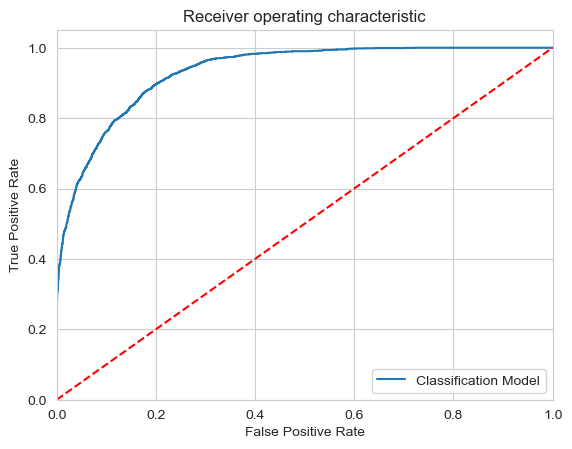

-----------------------------------------------------------------------------
Model Name: BaggingClassifier(n_estimators=100)
Confusion matrix:
 [[1247  767]
 [ 456 5668]]
Outcome values:
 1247 767 456 5668
Classification report: 
               precision    recall  f1-score   support

           1       0.73      0.62      0.67      2014
           0       0.88      0.93      0.90      6124

    accuracy                           0.85      8138
   macro avg       0.81      0.77      0.79      8138
weighted avg       0.84      0.85      0.85      8138

Accuracy: 85.0 %
Precision: 73.2 %
Recall: 61.9 %
F1 Score: 0.671
Specificity or True Negative Rate: 92.6 %
Balanced Accuracy: 77.2 %
MCC: 0.578
<function roc_auc_score at 0x0000024C658DD1F0> 0.772


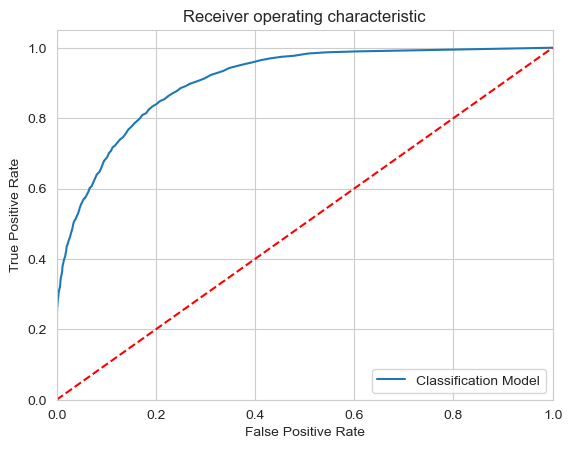

-----------------------------------------------------------------------------
Model Name: GradientBoostingClassifier()
Confusion matrix:
 [[1221  793]
 [ 305 5819]]
Outcome values:
 1221 793 305 5819
Classification report: 
               precision    recall  f1-score   support

           1       0.80      0.61      0.69      2014
           0       0.88      0.95      0.91      6124

    accuracy                           0.87      8138
   macro avg       0.84      0.78      0.80      8138
weighted avg       0.86      0.87      0.86      8138

Accuracy: 86.5 %
Precision: 80.0 %
Recall: 60.6 %
F1 Score: 0.69
Specificity or True Negative Rate: 95.0 %
Balanced Accuracy: 77.8 %
MCC: 0.615
<function roc_auc_score at 0x0000024C658DD1F0> 0.778


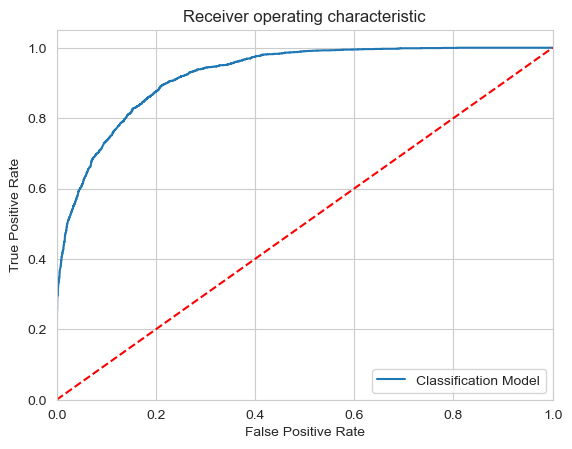

-----------------------------------------------------------------------------


In [52]:
#Build the Classification models and compare the results
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import lightgbm as lgb

#Create objects of classification algonthm with default hyper-parameters
ModelLR=LogisticRegression()
ModelDC= DecisionTreeClassifier()
ModelRF= RandomForestClassifier()
ModelET= ExtraTreesClassifier()
ModelKNN= KNeighborsClassifier(n_neighbors=5)
ModelGNB=GaussianNB()
ModelXGB=XGBClassifier(n_estimators=1, max_depth=3, eval_metric='mlogloss')
ModelSVM= SVC(probability=True)
ModelBAG= BaggingClassifier(base_estimator=None, n_estimators=100,
                             max_samples=1.0, max_features=1.0,bootstrap=True,
                             bootstrap_features=False, oob_score=False, warm_start=False,
                             n_jobs=None, random_state=None, verbose=0)

ModelGB= GradientBoostingClassifier()
ModelLGB= lgb.LGBMClassifier()

#Evalution matrix for all the algorithms

#MM (ModelLR, ModelDC, ModelRF, ModelET, ModeIKNN, ModelGNB, ModelSVM, ModelXGB, ModelLGB, ModelBAG, ModelGB, ModelLGB]

MM=[ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, ModelXGB, ModelLGB,ModelBAG,ModelGB]

for models in MM:
    #Fit the model
    models.fit(x_train,y_train)
    # Prediction
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    #Print the model name
    print('Model Name:',models)
    #confusion matrix in sklearn
    #confusion matrix in sklearn
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    #actual values
    actual = y_test
    # predicted values
    predicted=y_pred
    #confusion matrix
    matrix=confusion_matrix(actual, predicted, labels=[1,0],sample_weight=None,normalize=None)
    print('Confusion matrix:\n', matrix)
    #outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted, labels = [1,0]).reshape(-1)
    print('Outcome values:\n', tp, fn, fp, tn)
    #classification report for precision, recall f1-score and accuracy
    C_Report = classification_report(actual, predicted,labels=[1,0])
    print('Classification report: \n', C_Report)
    #calculating the metrics
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn),3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    precision=round(tp/(tp+fp),3);
    f1Score=round((2*tp/(2*tp+fp+fn)), 3);
    #Matthews Correlation Coefficient (MCC) Range of values of MCC lie between -1 to+1
    #A model with a score of 1 is a perfect model and -1 is a poor model
    mx=(tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)
    MCC=round(((tp*tn)-(fp*fn))/sqrt(mx), 3)
    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision:', round(precision*100, 2),'%')
    print('Recall:', round(sensitivity*100,2),'%')
    print('F1 Score:',f1Score)
    print('Specificity or True Negative Rate:', round(specificity*100,2),'%')
    print('Balanced Accuracy:', round(balanced_accuracy*100, 2),'%')
    print('MCC:', MCC)
    #Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score
    print(roc_auc_score, round(roc_auc_score(y_test, y_pred), 3))

   #ROC Curve
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc=roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    #plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f) % logit_roc_auc)
    plt.plot(fpr, tpr,label='Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------')
    new_row={'Model Name': models,'True_Positive':tp,'False_Negative': tn,'False_Positive':fp,'True_Negative': tn,
           'Accuracy': accuracy,'Precision': precision,'Recall': sensitivity,
           'F1 Score': f1Score,'Specificity': specificity,'MCC': MCC,
           'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
           'Balanced Accuracy': balanced_accuracy}
    Results = Results.append(new_row, ignore_index=True)



In [53]:
# Results

PredResults = pd.DataFrame({'income>50$':y_test, 'income>50$z':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = df.merge(PredResults, left_index=True, right_index=True)
TestDataResults.sample(10) 

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K,Region,income>50$,income>50$z
5344,32,Private,192965,9,Separated,Sales,Not-in-family,White,Female,0,0,45,United-States,0,North America,0,0
8324,34,Private,169583,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,1,North America,1,0
4224,38,Private,313914,13,Separated,Farming-fishing,Unmarried,White,Female,0,0,45,United-States,0,North America,0,0
19659,58,Local-gov,237879,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,58,United-States,0,North America,0,1
29067,31,Local-gov,190401,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0,North America,0,1
21634,19,Private,186717,10,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,0,North America,0,0
32649,18,Private,156056,9,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,12,United-States,0,North America,0,0
9856,33,State-gov,296282,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0,North America,0,0
36656,39,Private,352188,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,0,North America,0,0
34944,32,Private,46691,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0,North America,0,0


In [57]:
 models=['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','ExtraTreesClassifier','GradientBoostingClassifier','XGBClassifier','BaggingClassifier','LGBMClassifier','GaussianNB','SVC']
result=pd.DataFrame({'Model_Name':models})
result['Accuracy']=Results['Accuracy']
result['Precision']=Results['Precision']
result['Recall']=Results['Recall']
result['F1 Score']=Results['F1 Score']
result['Specificity or True Negative Rate']=Results['Specificity or True Negative Rate']
result['Balanced Accuracy']=Results['Balanced Accuracy']
result['MCC']=Results['MCC']
result=result.sort_values(by='Accuracy',ascending=False).reset_index(drop=True)
result

,Model_Name,Accuracy,Precision,Recall,F1 Score,Specificity or True Negative Rate,Balanced Accuracy,MCC
0,LGBMClassifier,0.871,0.784,0.660,0.717,NaN,0.800,0.638
1,SVC,0.865,0.800,0.606,0.690,NaN,0.778,0.615
2,RandomForestClassifier,0.856,0.746,0.633,0.685,NaN,0.781,0.595
3,GaussianNB,0.850,0.732,0.619,0.671,NaN,0.772,0.578
4,KNeighborsClassifier,0.839,0.696,0.622,0.657,NaN,0.766,0.554
5,DecisionTreeClassifier,0.811,0.616,0.626,0.621,NaN,0.749,0.495
6,BaggingClassifier,0.800,0.995,0.195,0.326,NaN,0.598,0.391
7,LogisticRegression,0.793,0.716,0.272,0.394,NaN,0.618,0.349
8,XGBClassifier,0.793,0.972,0.170,0.289,NaN,0.584,0.357
9,GradientBoostingClassifier,0.789,0.653,0.314,0.424,NaN,0.630,0.345
